In [1]:
import matplotlib as plt
import numpy as np
from numpy import pi
from qiskit import *
import math
from qiskit import Aer
from qiskit.tools.visualization import plot_histogram
from qiskit.circuit.library import QFT

In [2]:
def rotation(circuit, phase, control_qubit, target_qubit): 
    circuit.cp(2 * pi / 2**(phase), control_qubit, target_qubit)

def draper_adder_gate(num_qubits) :
    circuit = QuantumCircuit(num_qubits)

    for target_qubit in range(num_qubits - 1, num_qubits // 2 - 1, -1) :
        phase_index = 1
        for control_qubit in range(num_qubits -1 - target_qubit, -1, -1) :
            rotation(circuit, phase_index, control_qubit, target_qubit)
            phase_index += 1

    return circuit

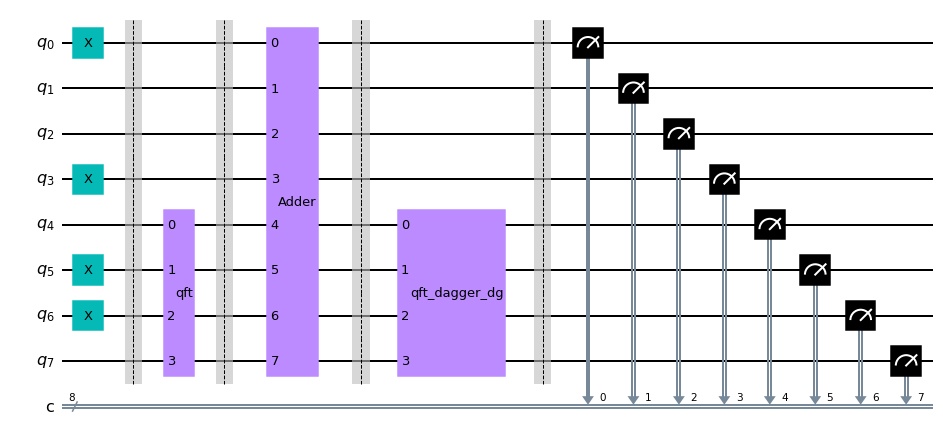

In [3]:
circuit = QuantumCircuit(8, 8)

# first number will be 1010 and second 0101 which should be added to 1111
circuit.x([0, 3])
circuit.x([5, 6])

circuit.barrier()

circuit.compose(QFT(4, do_swaps = True, name = 'qft'), qubits = [4, 5, 6, 7], inplace = True)

circuit.barrier()

# binary fraction addition of the two numbers, with the help of controlled phase gates
circuit.compose(draper_adder_gate(8).to_gate(label = 'Adder'), inplace = True)

circuit.barrier()

circuit.compose(QFT(4, do_swaps = True, inverse=True, name='qft_dagger'), qubits = [4, 5, 6, 7], inplace = True)

circuit.barrier()

circuit.measure([0, 1, 2, 3, 4, 5, 6, 7], [0, 1, 2, 3, 4, 5, 6, 7])

circuit.draw('mpl')

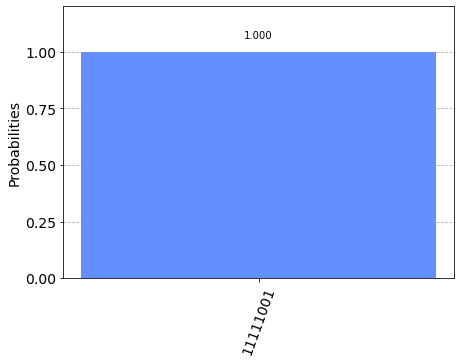

In [4]:

# simulate the circuit
simulator = simulator = Aer.get_backend('qasm_simulator')

result = execute(circuit, backend = simulator, shots = 1000).result()

counts = result.get_counts()

plot_histogram(counts)